In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
np.random.seed(42)

n = 200
X = np.random.uniform(-3 , 3 , n)
true_w = 2.5
true_b = -1.0
noise = np.random.normal(0 , 2 , n)
y = true_w * X + true_b + noise

In [23]:
def compute_loss(w , b):
    return np.mean((y - (w * X + b)) ** 2)

def full_batch_gd(lr = 0.01 , epochs = 50):
    w , b = 0.0 , 0.0
    losses = []
    for _ in range(epochs):
        y_pred = w * X + b
        dw = -2 * np.mean(X * (y - y_pred))
        db = -2 * np.mean(y - y_pred)
        w -= lr * dw
        b -= lr * db
        losses.append(compute_loss(w , b))
    return w , b , losses

In [24]:
def sgd(batch_size = 1 , lr = 0.01 , epochs = 50):
    w , b = 0.0 , 0.0
    losses = []
    for _ in range(epochs):
        indices = np.random.permutation(n)
        for i in range(0 , n , batch_size):
            batch_idx = indices[i : i + batch_size]
            Xb , yb = X[batch_idx] , y[batch_idx]
            y_pred = w * Xb + b
            dw = -2 * np.mean(Xb * (yb - y_pred))
            db = -2 * np.mean(yb - y_pred)
            w -= lr * dw
            b -= lr * db
        losses.append(compute_loss(w , b))
    return w , b , losses

w_full , b_full , loss_full = full_batch_gd()
w_sgd , b_sgd , loss_sgd = sgd(batch_size = 1)
w_mini , b_mini , loss_mini = sgd(batch_size = 20)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Loss vs Epochs')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'MSE Loss')

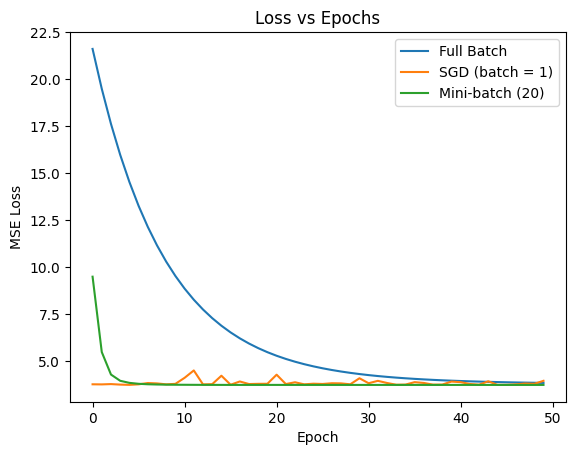

In [25]:
plt.figure()
plt.plot(loss_full , label = "Full Batch")
plt.plot(loss_sgd , label = "SGD (batch = 1)")
plt.plot(loss_mini , label = "Mini-batch (20)")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Final Full Batch Fit')

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

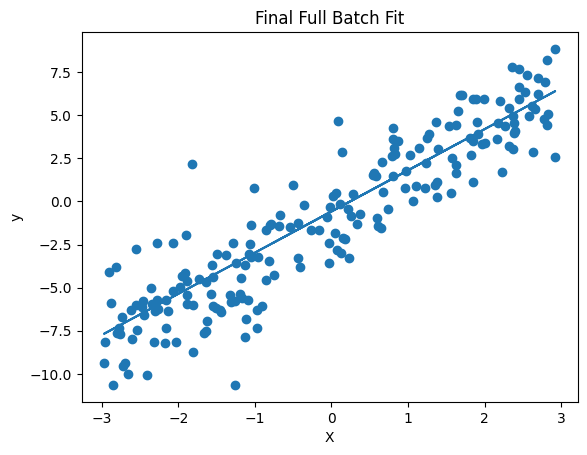

In [26]:
plt.figure()
plt.scatter(X , y)
plt.plot(X , w_full * X + b_full)
plt.title("Final Full Batch Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Final SGD Fit')

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

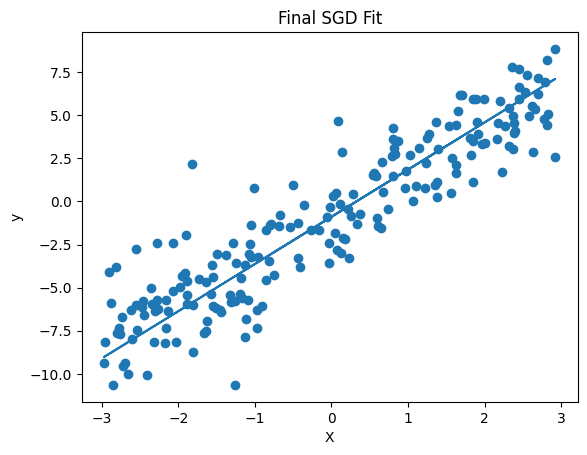

In [27]:
plt.figure()
plt.scatter(X , y)
plt.plot(X , w_sgd * X + b_sgd)
plt.title("Final SGD Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Final Mini-Batch Fit')

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

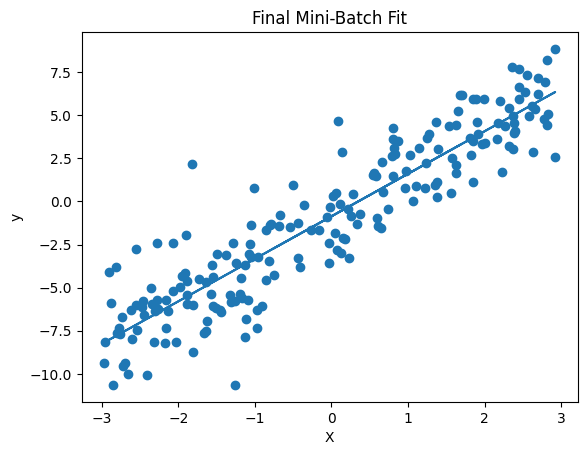

In [28]:
plt.figure()
plt.scatter(X , y)
plt.plot(X , w_mini * X + b_mini)
plt.title("Final Mini-Batch Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [29]:
print("Final Losses: ")
print(f"Full Batch: {loss_full[-1]:.3f}")
print(f"SGD: {loss_sgd[-1]:.3f}")
print(f"Mini-batch: {loss_mini[-1]:.3f}")

Final Losses: 
Full Batch: 3.842
SGD: 3.953
Mini-batch: 3.736
